In [9]:
import cv2 
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16,9
 
# Read the foreground image with alpha channel 
foreGroundImage = cv2.imread("foregroundImage.png", -1) 
foreGroundImage = cv2.resize(foreGroundImage,(960,540))
print(foreGroundImage.shape)
print(foreGroundImage.size)


(540, 960, 4)
2073600


In [10]:
# Split png foreground image 
b,g,r,a = cv2.split(foreGroundImage) 
print(a)
# Save the foregroung RGB content into a single object
foreground = cv2.merge((b,g,r))
# Save the alpha information into a single Mat
alpha = cv2.merge((a,a,a))

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [247 255 255 ... 255 255 247]
 [247 255 255 ... 255 255 247]
 [247 255 255 ... 255 255 247]]


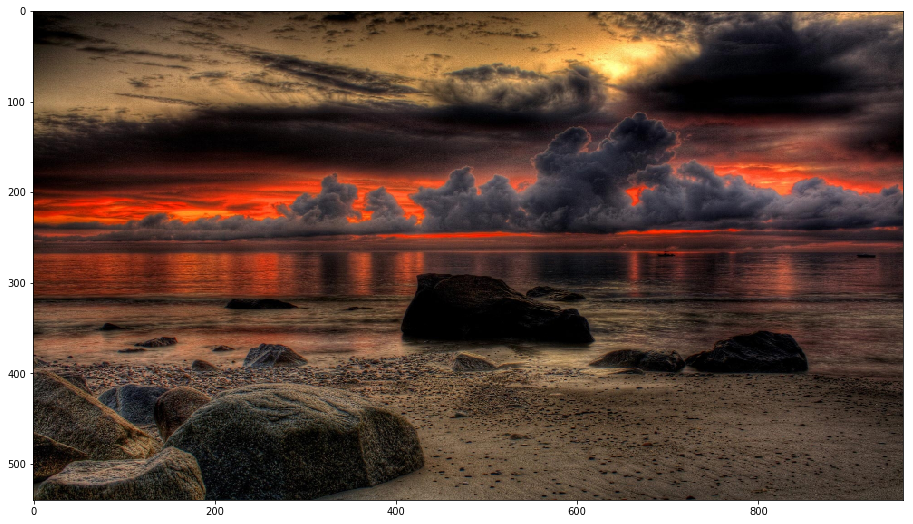

In [11]:
# Read background image 
# note : both images should be same size
background = cv2.imread("backGround.jpg")
background = cv2.resize(background,(960,540))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB)) # Another method to covert channel from BGR TO RGB
#plt.imshow(background, alpha=0.6)

In [12]:
# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
alpha = alpha.astype(float)/255


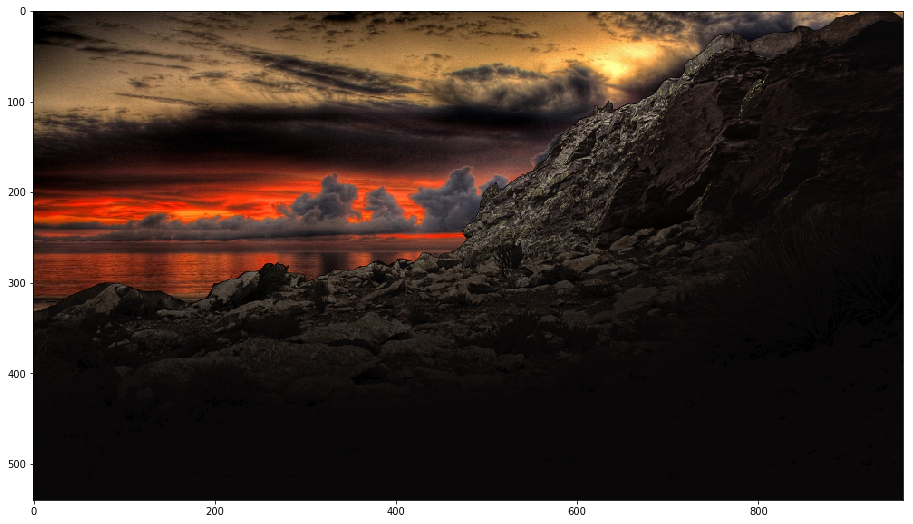

In [17]:

# Perform alpha blending 
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
outImage = cv2.add(foreground, background)

b,g,r = cv2.split(outImage) 
outImageTemp = cv2.merge([r,g,b])
# normalise to int
plt.imshow(outImageTemp/255)

In [8]:
cv2.imwrite("OutputImage.png", outImage)

True

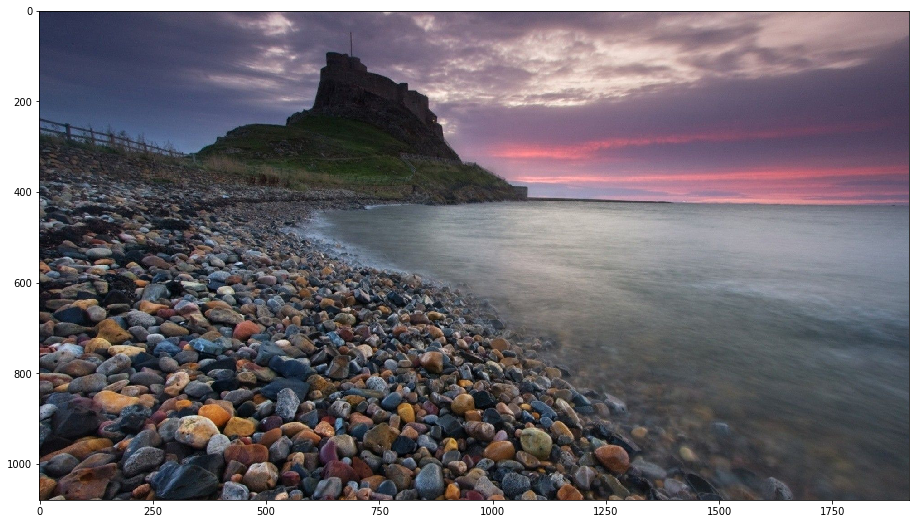

In [19]:
img1 = cv2.imread("img1.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

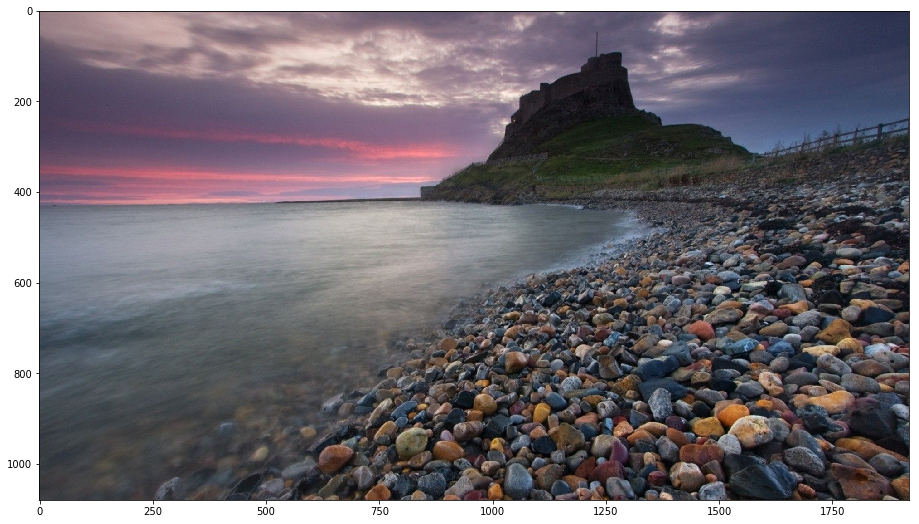

In [21]:
img2 = cv2.flip(img1, 1 )
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

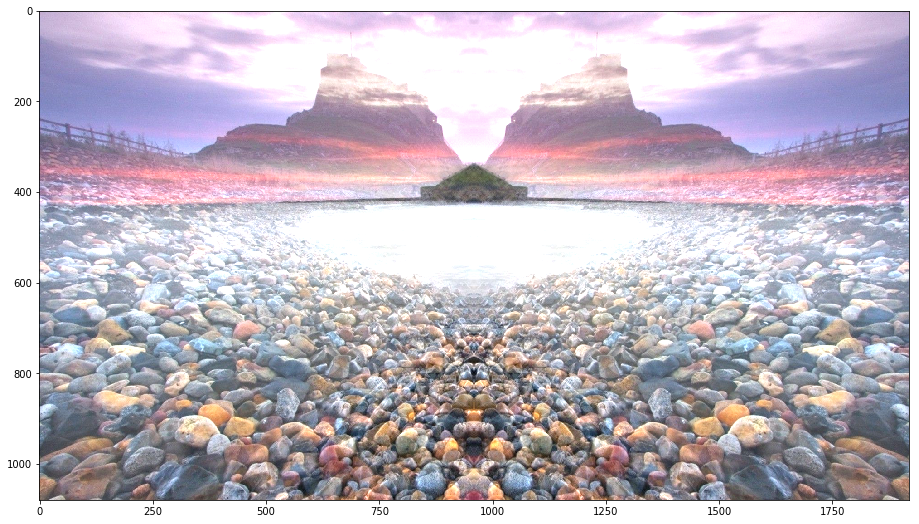

In [22]:
# Add the images 
img3 = cv2.add(img1, img2) 
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

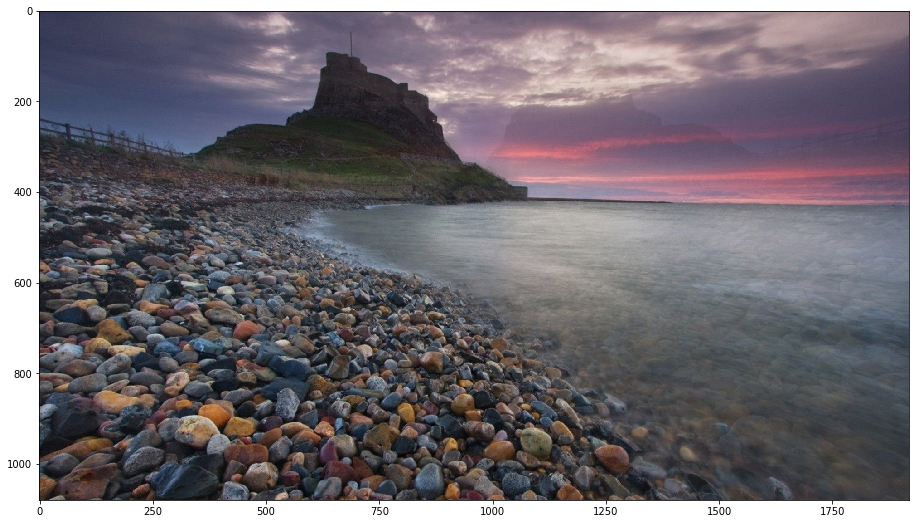

In [29]:
# g(x) = (1 - a)f(x) + af1(x)
# img = a . img1 + b . img 2 + y

img4 = cv2.addWeighted(img1, 0.9, img2, 0.1, 0) 
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))